In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# plt.rcParams['figure.figsize'] = [12, 9]
import scipy.optimize as opt
import torch
import torch.nn as nn
import pickle

RMSE of fit: 0.060
opt p: 3.16
opt loss: 2.268962285459069


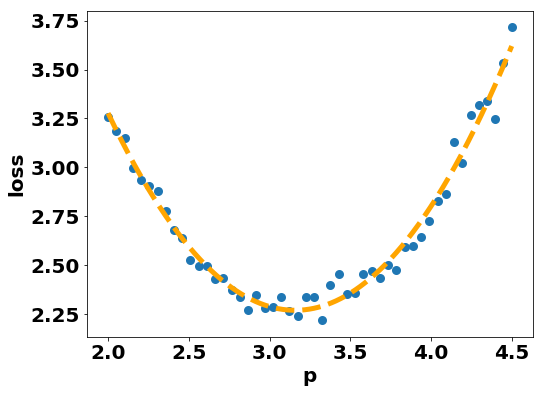

In [382]:
data = pickle.load(open('../data/resnet18_WNoneA2_loss_vs_p_points.pkl', 'rb'))
loss = data['loss']
p = data['p']
points_p1 = np.array(data['points'])

plt.scatter(p, loss, linewidth=3);
plt.ylabel('loss', fontsize=20, weight='bold')
plt.xlabel('p', fontsize=20, weight='bold');

xp = np.linspace(np.min(p), np.max(p), 1000)
z = np.polyfit(p, loss, 2)
y = np.poly1d(z)
plt.plot(xp, y(xp), '--', linewidth=5, c='orange');

# plt.legend(["L(p) = {:.2f}*p^2 + {:.2f}*p + {:.2f}".format(z[0], z[1], z[2])]);
print("RMSE of fit: {:.3f}".format(np.sqrt(np.mean((y(p) - loss)**2))))
print("opt p: {:.2f}".format(xp[np.argmin(y(xp))]))
print("opt loss: {}".format(np.min(y(xp))))

opt_idx = np.argmin(np.abs(p - xp[np.argmin(y(xp))]))
opt_point1 = points_p1[opt_idx]

RMSE of fit: 0.067
opt p: 20.78
opt loss: 2.4561958129787715


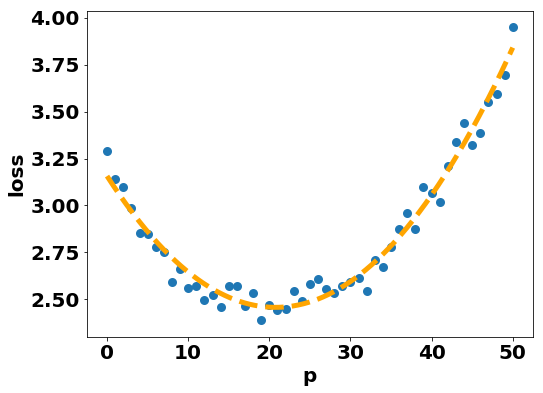

In [423]:
plt.rcParams['figure.figsize'] = [8, 6]
font = {'weight' : 'normal', 'size': 20, 'weight': 'bold'}
matplotlib.rc('font', **font)

data = pickle.load(open('../data/resnet18_WNoneA2_loss_vs_clipping.pkl', 'rb'))
loss = data['loss']
p = np.arange(len(loss))
points_p2 = np.array(data['points'])

plt.scatter(p, loss, linewidth=3);
plt.ylabel('loss', fontsize=20, weight='bold')
plt.xlabel('p', fontsize=20, weight='bold');

xp = np.linspace(np.min(p), np.max(p), 1000)
z = np.polyfit(p, loss, 2)
y = np.poly1d(z)
plt.plot(xp, y(xp), '--', linewidth=5, c='orange');

# plt.legend(["L(p) = {:.2f}*p^2 + {:.2f}*p + {:.2f}".format(z[0], z[1], z[2])]);
print("RMSE of fit: {:.3f}".format(np.sqrt(np.mean((y(p) - loss)**2))))
print("opt p: {:.2f}".format(y.deriv().roots[0]))
print("opt loss: {}".format(y(y.deriv().roots)[0]))

opt_idx = np.argmin(np.abs(p - xp[np.argmin(y(xp))]))
opt_point2 = points_p2[opt_idx]

# plt.tight_layout()
# plt.savefig('../fig/resnet18_loss_vs_p.pdf')

In [386]:
p_opt = y.deriv().roots
step = (data['end'] - data['start']) / len(data['loss'])
start = data['start']
start + p_opt * step

array([0.35698391, 1.47067309, 0.22719418, 3.04389384, 0.31681387,
       1.66861867, 0.20220829, 3.48987974, 0.1891253 , 1.51349334,
       0.18794774, 2.33335529, 0.43585295, 0.19049199, 1.49330423,
       0.14737699, 2.46490852, 0.16204586, 1.41936287, 0.13190076,
       1.77873186, 0.15225926, 0.11543261, 1.08320536, 0.11142543,
       1.79654213, 0.10616338, 1.05873662, 0.09536656, 2.20379152,
       0.23467178, 0.08260386, 1.02184929])

RMSE of fit: 0.070
opt p: 24.72
opt loss: 2.360452718477891


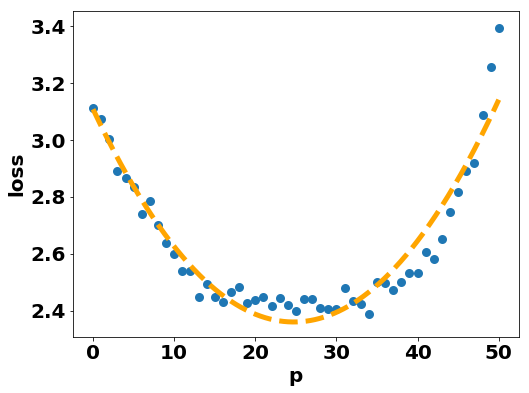

In [354]:
data = pickle.load(open('../data/resnet18_WNoneA2_loss_conjugate_dir.pkl', 'rb'))
loss = data['loss']
p = np.arange(len(loss))
points_p3 = np.array(data['points'])

plt.scatter(p, loss, linewidth=3);
plt.ylabel('loss', fontsize=20, weight='bold')
plt.xlabel('p', fontsize=20, weight='bold');

xp = np.linspace(np.min(p), np.max(p), 1000)
z = np.polyfit(p, loss, 2)
y = np.poly1d(z)
plt.plot(xp, y(xp), '--', linewidth=5, c='orange');

# plt.legend(["L(p) = {:.2f}*p^2 + {:.2f}*p + {:.2f}".format(z[0], z[1], z[2])]);
print("RMSE of fit: {:.3f}".format(np.sqrt(np.mean((y(p) - loss)**2))))
print("opt p: {:.2f}".format(xp[np.argmin(y(xp))]))
print("opt loss: {}".format(np.min(y(xp))))
opt_idx = np.argmin(np.abs(p - xp[np.argmin(y(xp))]))
opt_point3 = points_p3[opt_idx]

In [355]:
opt_point3

array([0.7677084 , 1.7640269 , 0.80914754, 2.044024  , 0.87229156,
       1.2659631 , 0.78454655, 1.3018194 , 0.78946936, 0.92967707,
       0.5754433 , 0.9115604 , 0.5689196 , 1.2382566 , 0.601773  ],
      dtype=float32)

In [378]:
opt_point2

array([0.8135005 , 1.7248632 , 0.8009758 , 2.005755  , 0.83956134,
       1.2431265 , 0.7720454 , 1.3013302 , 0.76733077, 0.96402454,
       0.5914314 , 0.9579072 , 0.56543064, 1.2535284 , 0.6261679 ],
      dtype=float32)

In [346]:
d = opt_point1 - opt_point2
# d = d / np.linalg.norm(d)
d

array([-0.0457921 ,  0.03916371,  0.00817174,  0.03826904,  0.03273022,
        0.02283657,  0.01250118,  0.00048923,  0.02213854, -0.03434747,
       -0.01598805, -0.04634678,  0.00348896, -0.01527178, -0.02439487],
      dtype=float32)

In [387]:
from sklearn.decomposition import PCA

In [420]:
pca = PCA(n_components=2)
p1_pca = pca.fit_transform(points_p1)
p2_pca = pca.fit_transform(points_p2)
p1_pca.shape

(50, 2)

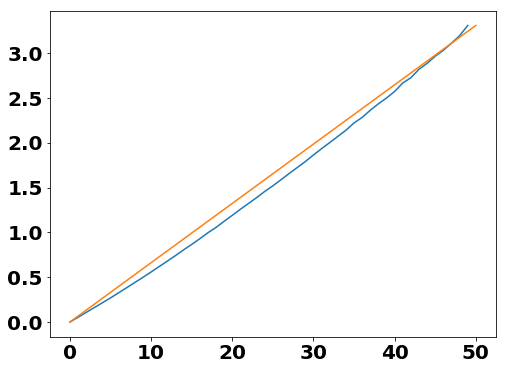

In [419]:
plt.plot(p1_pca - p1_pca[0]);
plt.plot(p2_pca - p2_pca[0]);

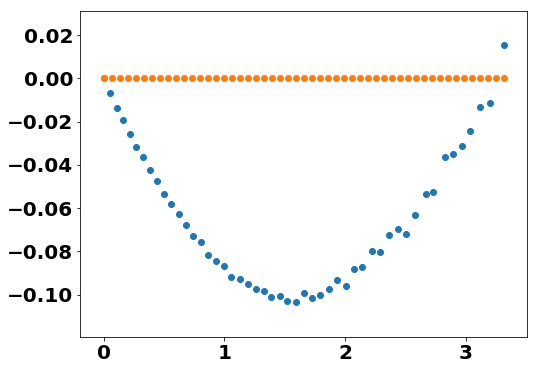

In [422]:
p1_pca = p1_pca - p1_pca[0, :]
p2_pca = p2_pca - p2_pca[0, :]
plt.scatter(p1_pca[:,0], p1_pca[:,1]);
plt.scatter(p2_pca[:,0], p2_pca[:,1]);

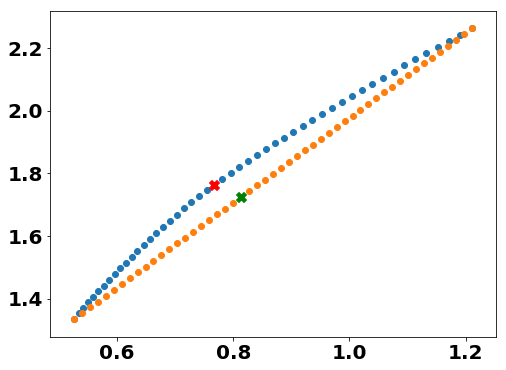

In [397]:
plt.scatter(points_p1[:,:2][:,0], points_p1[:,:2][:,1]);
plt.scatter(points_p2[:,:2][:,0], points_p2[:,:2][:,1]);
plt.scatter(opt_point1[0], opt_point1[1], marker='X', s=100, c='r')
plt.scatter(opt_point2[0], opt_point2[1], marker='X', s=100, c='g')